In [1]:
# Install scikit-learn package
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = float((output != label).sum()) * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return error*100

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error: 0.3750%
Error: 5.0000%
Error: 3.0000%
Error: 1.2500%
Error: 1.0000%
Error: 1.0000%
Error: 0.8750%


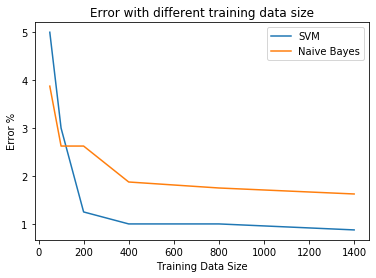

In [6]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
# dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN')
# dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')
dataMatrix_train1, tokenlist1, category_train1 = readMatrix('q5_data/MATRIX.TRAIN')
dataMatrix_train2, tokenlist2, category_train2 = readMatrix('q5_data/MATRIX.TRAIN.50')
dataMatrix_train3, tokenlist3, category_train3 = readMatrix('q5_data/MATRIX.TRAIN.100')
dataMatrix_train4, tokenlist4, category_train4 = readMatrix('q5_data/MATRIX.TRAIN.200')
dataMatrix_train5, tokenlist5, category_train5 = readMatrix('q5_data/MATRIX.TRAIN.400')
dataMatrix_train6, tokenlist6, category_train6 = readMatrix('q5_data/MATRIX.TRAIN.800')
dataMatrix_train7, tokenlist7, category_train7 = readMatrix('q5_data/MATRIX.TRAIN.1400')

dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')
# print(dataMatrix_train.shape)



# Train

clf = LinearSVC()
clf.fit(dataMatrix_train1, category_train1) 
prediction = clf.predict(dataMatrix_test)
e1 = evaluate(prediction, category_test)

clf.fit(dataMatrix_train2, category_train2) 
prediction = clf.predict(dataMatrix_test)
e2 = evaluate(prediction, category_test)
 
clf.fit(dataMatrix_train3, category_train3) 
prediction = clf.predict(dataMatrix_test)
e3 = evaluate(prediction, category_test)

clf.fit(dataMatrix_train4, category_train4) 
prediction = clf.predict(dataMatrix_test)
e4 = evaluate(prediction, category_test)

clf.fit(dataMatrix_train5, category_train5) 
prediction = clf.predict(dataMatrix_test)
e5 = evaluate(prediction, category_test)

clf.fit(dataMatrix_train6, category_train6) 
prediction = clf.predict(dataMatrix_test)
e6 = evaluate(prediction, category_test)

clf.fit(dataMatrix_train7, category_train7) 
prediction = clf.predict(dataMatrix_test)
e7 = evaluate(prediction, category_test)



a = [e2, e3 , e4 , e5, e6, e7]
b = [50,100,200,400,800,1400]

c = [3.8750, 2.6250,2.6250, 1.8750, 1.7500, 1.6250]
d = [50,100,200,400,800,1400]
plt.xlabel('Training Data Size')
plt.ylabel('Error %')
plt.plot(b,a, label = 'SVM')
plt.plot(d,c, label = 'Naive Bayes')
plt.title('Error with different training data size')
plt.legend()
plt.show()

